In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict, List, Any, Optional, Union

def load_json(file_path: str) -> Dict[str, Any]:
    """
    Load JSON data from a file and return it as a dictionary.

    Parameters:
    file_path (str): The path to the JSON file.

    Returns:
    dict: The JSON data as a dictionary.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def json_to_df(json_data: Dict[str, Dict[str, float]], metric: str, mapping_dict: Optional[Dict[str, str]] = None) -> pd.DataFrame:
    """
    Convert JSON data to a DataFrame.

    Parameters:
        json_data (Dict[str, Dict[str, float]]): The JSON data to be converted.
        metric (str): The name of the metric to be used as column name in the DataFrame.
        mapping_dict (Optional[Dict[str, str]]): Dictionary to map values of 'Ref' column. Defaults to None.

    Returns:
        pd.DataFrame: DataFrame containing the JSON data with columns: 'sample', 'chrom', and the specified metric.
    """
    data = []
    for key, values in json_data.items():
        for ref_key, value in values.items():
            if mapping_dict:
                mapped_ref = mapping_dict.get(ref_key, ref_key)
            else:
                mapped_ref = ref_key
            data.append([key, mapped_ref, value])

    df = pd.DataFrame(data, columns=['sample', 'chrom', metric])
    return df

def remove_samples(df: pd.DataFrame, samples: Union[str, List[str]]) -> pd.DataFrame:
    """
    Remove rows from the DataFrame based on the given sample(s).

    Parameters:
        df (pd.DataFrame): The DataFrame to be cleaned.
        samples (Union[str, List[str]]): Single sample name as a string or list of sample names.

    Returns:
        pd.DataFrame: Cleaned DataFrame with specified samples removed.
    """
    if isinstance(samples, str):
        samples = [samples]
    elif not isinstance(samples, list):
        raise ValueError("Samples must be a string or a list of strings.")
    
    # Check if all sample names are valid
    invalid_samples = set(samples) - set(df['sample'])
    if invalid_samples:
        raise ValueError(f"The following sample names are not present in the DataFrame: {invalid_samples}")

    return df[~df['sample'].isin(samples)]

In [3]:
# Dict used to rename the chromosomes by a roman number
mapping_dict = {
    'ref|NC_001133|': '1',
    'ref|NC_001134|': '2',
    'ref|NC_001135|': '3',
    'ref|NC_001136|': '4',
    'ref|NC_001137|': '5',
    'ref|NC_001138|': '6',
    'ref|NC_001139|': '7',
    'ref|NC_001140|': '8',
    'ref|NC_001141|': '9',
    'ref|NC_001142|': '10',
    'ref|NC_001143|': '11',
    'ref|NC_001144|': '12',
    'ref|NC_001145|': '13',
    'ref|NC_001146|': '14',
    'ref|NC_001147|': '15',
    'ref|NC_001148|': '16',
    'ref|NC_001224|': 'mit',
}

In [6]:
# Upload pi data
file_path = 'diversity.json'
json_data = load_json(file_path)
df = json_to_df(json_data, 'pi', mapping_dict)

print(df)

          sample        chrom        pi
0     population            1  0.005047
1     population            2  0.004508
2     population            3  0.004558
3     population            4  0.004416
4     population            5  0.004664
...          ...          ...       ...
1542          76           13  0.002974
1543          76           14  0.002990
1544          76           15  0.002869
1545          76           16  0.003073
1546          76  genome-wide  0.002966

[1547 rows x 3 columns]


## Plot the genome wide pi distribution

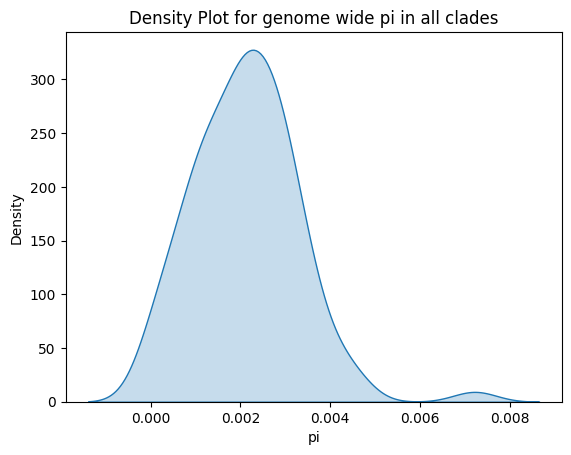

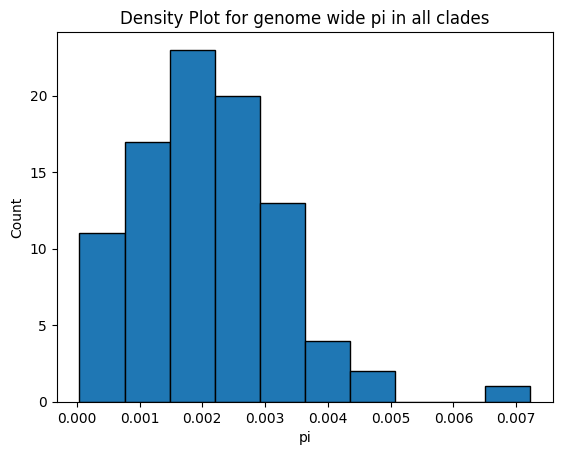

In [13]:
# Filter the DataFrame to keep only genome wide
gw_df = df[df['chrom'] == 'genome-wide']

# Plot the density plot
sns.kdeplot(filtered_df['pi'], fill=True)
plt.title('Density Plot for genome wide pi in all clades')
plt.xlabel('pi')
plt.ylabel('Density')
plt.show()

plt.hist(filtered_df['pi'], bins=10, edgecolor='black')
plt.title('Density Plot for genome wide pi in all clades')
plt.xlabel('pi')
plt.ylabel('Count')
plt.show()